In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np
import time

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 59
np.random.seed(seed)
print(seed)

59


In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [7]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)

In [8]:
cos = np.cos
sin = np.sin

In [9]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [10]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [11]:
n_grid = 20
range_min = 0
range_max = 10
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [12]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss


In [13]:
import numpy as np
from scipy.optimize import minimize
import random

# Initialize w and theta with random values
np.random.seed(seed)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])
theta = np.random.uniform(0, 2 * np.pi, size=(3,3))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])
start_time = time.time()

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


# SAVE PARAMETERS
# Generate a random string for the file name
random_string = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=8))

# Get the current time as a timestamp
timestamp = int(time.time())

# Combine the timestamp and random string to create the file name
file_name = f"data_{timestamp}_{random_string}.npz"

# Save the data to a file using np.savez
np.savez(file_name, w=w, theta=theta)

print(f"Data saved to file: {file_name}")

Current loss: 8501352.19566615
Current loss: 8195042.617971411
Current loss: 7619556.994659324
Current loss: 6652513.368612956
Current loss: 5537341.139146483
Current loss: 3699432.2010173565
Current loss: 3397405.2301766337
Current loss: 3328686.316356483
Current loss: 2925137.1353765232
Current loss: 2615996.7772317356
Current loss: 2564330.4007075513
Current loss: 2540063.0096310424
Current loss: 2513719.1790200565
Current loss: 2493650.3361250455
Current loss: 2489159.0753357173
Current loss: 2157093.549020124
Current loss: 2135457.7348096995
Current loss: 1939890.72191234
Current loss: 1630171.2654035366
Current loss: 1242957.5147807784
Current loss: 1191346.7699071295
Current loss: 1027145.1454596656
Current loss: 1014954.8319823667
Current loss: 991644.3590967776
Current loss: 948450.0073240869
Current loss: 879079.7438249895
Current loss: 827199.8656847063
Current loss: 815644.9745896097
Current loss: 799185.1598430783
Current loss: 793667.6852761155
Current loss: 784163.012779

In [14]:
# del1_target_values=[0.0626, 0.06394953720748847, 0.06569858715713423, 0.06744244389809965, 0.06917493985888266, 0.07089600117637695, 0.0726056471914906, 0.07430390045064243, 0.0759907845405738, 0.07766632444992065]
# omega1_target_values=[1.0, 1.0002069924246, 1.0002088049028726, 1.0002074843265396, 1.0002061187357987, 1.000204754843149, 1.0002033935810348, 1.0002020350042453, 1.00020067936557, 1.0001993268474256]

# del2_target_values=[1.0567, 1.0546544667275142, 1.0519901861963084, 1.0493173304191084, 1.0466454552333528, 1.0439749894178083, 1.0413062204618804, 1.038639428349044, 1.0359748887572569, 1.0333128725781264]
# omega2_target_values=[1.0, 0.9996856425639036, 0.9996809513541733, 0.9996809963420219, 0.9996811466084681, 0.999681332251746, 0.9996815515716131, 0.9996818041713461, 0.9996820893345619, 0.9996824064336052]

# del3_target_values=[0.9449, 0.9409949885389632, 0.9359509313652853, 0.9309431320916126, 0.9259892325618977, 0.9210890966388376, 0.9162423146667987, 0.9114484672809254, 0.9067071331041561, 0.9020178871027813]
# omega3_target_values=[1.0, 0.9994018360090102, 0.999399096933448, 0.9994054478250824, 0.9994118884331064, 0.9994182819033591, 0.9994246255160472, 0.9994309193276854, 0.9994371623779974, 0.9994433541266963]

In [15]:
del1_target_values=[0.0626, 0.09341432164775261, 0.12079564022508556, 0.14460985501730703, 0.16520120698638144, 0.182927275530805, 0.19813494438566373, 0.21114750420476242, 0.22225864314078608, 0.23173047864528604, 0.2397941922978119, 0.24665176222272217, 0.25247855065363606, 0.257425915839366, 0.2616242467405576, 0.2651850693576057, 0.2682040204583055, 0.27076278896444067, 0.27293071937527996, 0.2747671346505616, 0.27632253968882675, 0.27763954209375213, 0.2787545068038462, 0.2796983741467021, 0.2804973072795233]
omega1_target_values=[1.0, 1.0001863309582968, 1.0001626130996506, 1.0001409683596127, 1.0001215907769283, 1.0001044740076304, 1.0000894995588936, 1.000076493204777, 1.0000652563321863, 1.0000555879434365, 1.0000472965348077, 1.0000402026971469, 1.0000341464415197, 1.0000289838299135, 1.0000245884041752, 1.0000208508841077, 1.000017674527786, 1.0000149773224956, 1.0000126887387517, 1.0000107472740587, 1.000009101030739, 1.0000077057818824, 1.0000065236618427, 1.000005522054513, 1.0000046737616586]
del2_target_values=[1.0567, 1.0075428422697816, 0.9595037963185306, 0.9143918263779075, 0.8729051473311077, 0.835373743225765, 0.8018591936641181, 0.7722399354318495, 0.7462793865379225, 0.7236764523880203, 0.7041018756825232, 0.6872230831969404, 0.6727194579158291, 0.6602920402380292, 0.6496680057048514, 0.640602639812288, 0.632879085319277, 0.626306752895535, 0.6207199625221287, 0.6159748228595487, 0.6119470436566772, 0.6085304057073849, 0.6056335068798869, 0.6031780995592958, 0.6010975528223498]
omega2_target_values=[1.0, 0.9996870586494475, 0.999702521415701, 0.9997238250822517, 0.9997482900278563, 0.999773901666429, 0.999799241724983, 0.999823378310116, 0.9998457577921829, 0.9998661006322226, 0.9998843134695049, 0.9999004371829757, 0.9999145796819283, 0.999926899338135, 0.999937572690069, 0.999946773528767, 0.9999546833777068, 0.9999614612631639, 0.9999672529449859, 0.999972196830927, 0.9999764092236356, 0.9999799931255174, 0.9999830384464495, 0.9999856266627667, 0.999987822900838]
del3_target_values=[0.9449, 0.8589381633385749, 0.7883862027699157, 0.7315862583001482, 0.6858913377609489, 0.6490478764511847, 0.6192190335809141, 0.5949458946201717, 0.5750857889371048, 0.5587496170754702, 0.5452456503659117, 0.5340336680280026, 0.5246894759236284, 0.5168771122375285, 0.5103280550855711, 0.5048267036189258, 0.5001973381425661, 0.49629639154872984, 0.4930061175748399, 0.49022844630543205, 0.48788189949938116, 0.4858989002561324, 0.4842224791842126, 0.4828047554680998, 0.4816056008516666]
omega3_target_values=[1.0, 0.9995009869778277, 0.9995976140659996, 0.9996763630396527, 0.9997394370511467, 0.999789511319577, 0.9998291559626818, 0.999860584099834, 0.9998856108030243, 0.9999056616880464, 0.9999218301747135, 0.9999349665460899, 0.9999457052471379, 0.9999545401117179, 0.9999618491939446, 0.9999679190286025, 0.9999729848895083, 0.9999772241306346, 0.999980778433593, 0.9999837677872397, 0.9999862851177782, 0.9999884069067698, 0.9999901966495104, 0.9999917091941619, 0.9999929868959316]

In [20]:
del1_target_values = [
    0.0626, 0.10098353444272273, 0.1337529441489056, 0.16111624773025374,
    0.18378752075298793, 0.20246678734255205, 0.21779448941379415, 0.2303341101460303,
    0.24056958695783312, 0.24890988678561546, 0.25569685023169436, 0.26121413632075896,
    0.26569552350536807, 0.26933324041059925, 0.2722845415419281, 0.27467789915258234,
    0.27661831397425485, 0.2781908478189174, 0.2794650318578603, 0.2804973072795233
]

omega1_target_values = [
    1.0, 1.0001799104660687, 1.0001509444962458, 1.0001254799870676, 1.000103633885802,
    1.000085189020167, 1.0000697846104, 1.000057018307727, 1.000046496417227,
    1.0000378585873102, 1.0000307903541732, 1.0000250183161667, 1.0000203143254247,
    1.0000164847705442, 1.0000133712044357, 1.0000108416639841, 1.000008787783504,
    1.000007121384983, 1.0000057697323597, 1.0000046737616586
]

del2_target_values = [
    1.0567, 0.9946735652124882, 0.9353416845487946, 0.8813169094098751, 0.8335100905354884,
    0.7920943582065776, 0.7567825871792968, 0.7270353961919391, 0.7022039133236059,
    0.6816197215365047, 0.6646468599846002, 0.6507089109583296, 0.6392991122808219,
    0.6299815522299244, 0.6223868941216683, 0.6162056640164337, 0.6111802274428345,
    0.6070984990973556, 0.6037853809752156, 0.6010975528223498
]

omega2_target_values = [
    1.0, 0.9996903854620386, 0.999713191045473, 0.9997429860302225, 0.9997752521232283,
    0.9998070263040743, 0.9998365731427764, 0.9998630292320457, 0.9998861073695898,
    0.9999058711794161, 0.9999225609898238, 0.9999365215730096, 0.9999481038292716,
    0.9999576664418094, 0.9999655220346618, 0.9999719559029536, 0.9999772128301844,
    0.9999814975627401, 0.9999849860998363, 0.999987822900838
]

del3_target_values = [
    0.9449, 0.8388780872637925, 0.7569534000499055, 0.6947065282006821, 0.647317332634727,
    0.6110134782621555, 0.582972115680298, 0.5611250100306813, 0.5439657143992093,
    0.5303932193015083, 0.5195953500053637, 0.5109647029942477, 0.50404178779062,
    0.49847333065238514, 0.493985503278441, 0.4903632313728563, 0.48743626179101623,
    0.4850697320597278, 0.48315512873164085, 0.4816056008516666
]

omega3_target_values = [
    1.0, 0.9995282269471255, 0.99964117082961, 0.9997273301300212, 0.9997918362134607,
    0.9998398725271868, 0.9998757565346595, 0.9999027779905014, 0.9999233428064149,
    0.9999391738001281, 0.9999514800150554, 0.9999611426466298, 0.9999687804503699,
    0.9999748617372376, 0.9999797223652448, 0.9999836230181689, 0.9999867624294317,
    0.999989292490619, 0.9999913355619313, 0.9999929868959316
]

In [21]:
# import matplotlib.pyplot as plt

# # delta1_omega1
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')



# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')



# # delta2_omega2
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')

# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')



# # delta3_omega3
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')

# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('verify')

# raise Exception

In [22]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

20
20
0.2804973072795233


Text(0.5, 1.0, 'Fitting Data')

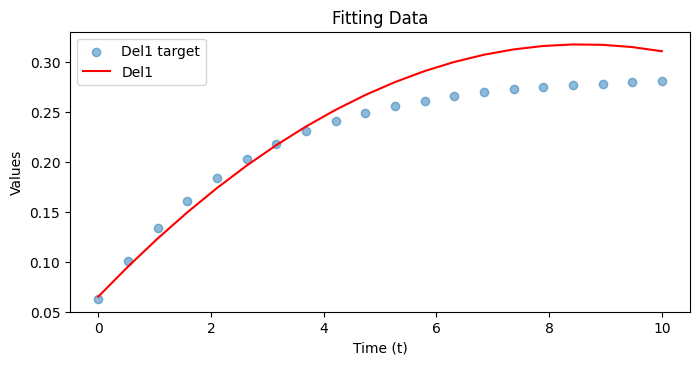

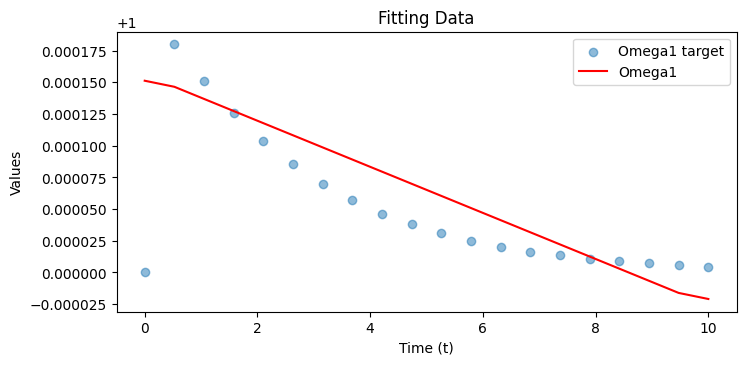

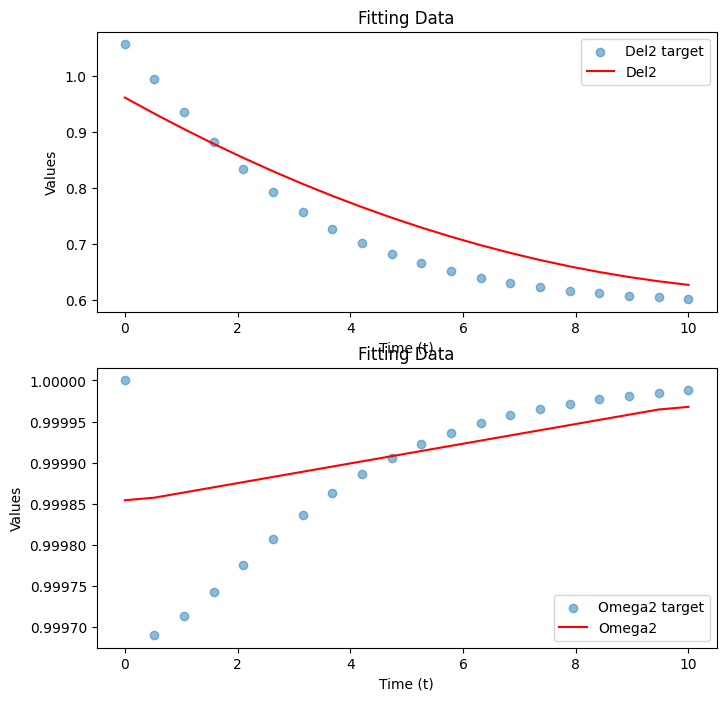

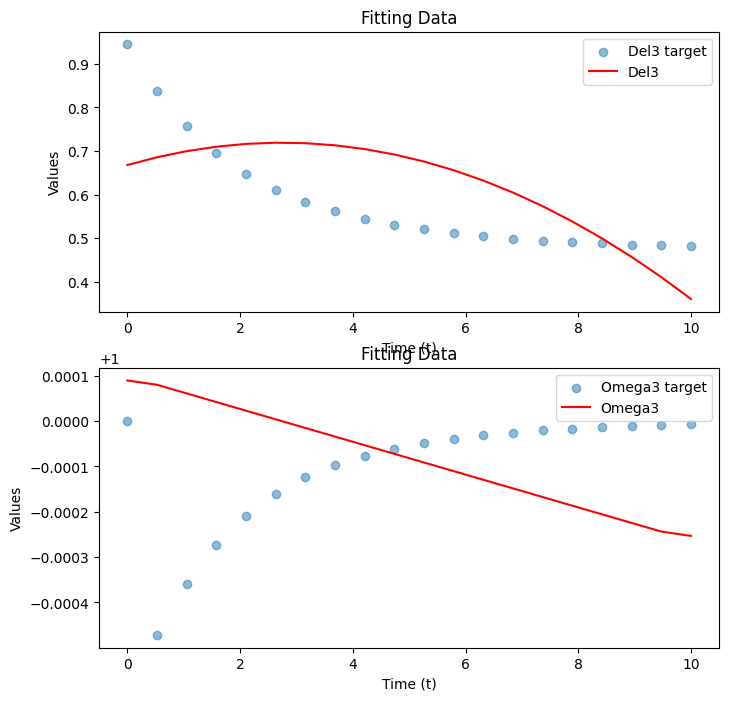

In [23]:
import matplotlib.pyplot as plt

# t2_data = [t_data[i] for i in range(0,len(t_data),2) ]
# del1_target_values_2 =  [del1_target_values[i] for i in range(0,len(del1_target_values),2) ]
# print(len(t2_data))
# print(len(del1_target_values_2))

print(len(t_data))
print(len(del1_target_values))

# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = [f(theta1,w1,ti) for ti in t_data]
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(del1_target_values[-1])


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = [f(theta2,w2,ti) for ti in t_data]
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

In [24]:
print('del1: ',del1_target_values[-1])
print('omega1: ',omega_pred1[-1])
print('delt2: ',del2_target_values[-1])
print('omega2: ',omega_pred2[-1])
print('del3: ',del3_target_values[-1])
print('omega3: ',omega_pred3[-1])


del1:  0.2804973072795233
omega1:  0.9999790416243003
delt2:  0.6010975528223498
omega2:  0.9999678383051748
del3:  0.4816056008516666
omega3:  0.9997468527867932
